In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/fake news

/content/drive/My Drive/fake news


In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np
df=pd.read_excel('threatning.xlsx')
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [ ]:
df.head(2)

,Tweets,label,S/G
0,بکواس مت کرو,1,1
1,تمہاری ہیجڑا فورس ایک نہتے کے سامنے بکری بنی ہ...,1,0


In [ ]:
X=df.drop(['label','S/G'],axis=1)

In [ ]:
y=df['label']

In [ ]:
verbs = open("urduverbswithforms.txt",encoding='utf-8').read().split()

In [ ]:
import re
corpus = [] 
for i in range(0, len(df)):
    review = re.sub('[^آ-ے]', ' ', str(df['Tweets'][i]))
    review = review.split()
    review = [word for word in review if word in verbs]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
import re
corpus1 = [] 
for i in range(0, len(df)):
    review = re.sub('[^آ-ے]', ' ', str(df['Tweets'][i]))
    review = review.split()
    review = ' '.join(review)
    corpus1.append(review)

# Feature Extraction

In [ ]:
ng=(1,4)
w='word'
c='char'
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.feature_extraction.text import CountVectorizer
tfidf_v=CountVectorizer(max_features=None,analyzer=c,ngram_range=ng)
tfidf_v1=CountVectorizer(max_features=None,analyzer=c,ngram_range=ng)

In [ ]:
X=tfidf_v.fit_transform(corpus).toarray()
X1=tfidf_v1.fit_transform(corpus1).toarray()

In [ ]:
X3=np.hstack((X,X1))

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3,stratify=y,random_state=42)
print("Training split input- ", X_train.shape)
#print("Testing split input- ", X_test.shape)
#count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

Training split input-  (2494, 48753)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import metrics
clfs = list()
clfs.append(('bnb',BernoulliNB()))
clfs.append(('extra',ExtraTreesClassifier()))
clfs_est = LogisticRegression()
stack = StackingClassifier(estimators=clfs, final_estimator=clfs_est)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
bnb=stack.fit(X_train,y_train)

bnb_p=bnb.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
#bnb_p=lr.predict(X_test)
cm1 = confusion_matrix(y_test,bnb_p)
tp=cm1[0,0]
fp=cm1[0,1]
fn=cm1[1,0]
tn=cm1[1,1]

pr=tp/(tp+fp)
rc=tp/(tp+fn)
#f1=2*(pr*rc)/(pr+rc)
print("Accuracy",metrics.accuracy_score(y_test,bnb_p)*100)
print("Precision", pr*100)
print("Sen", rc*100)
print("F1",f1_score(y_test, bnb_p, average='macro')*100)

Accuracy 71.77570093457943
Precision 66.35514018691589
Sen 74.42348008385744
F1 71.69252656070417


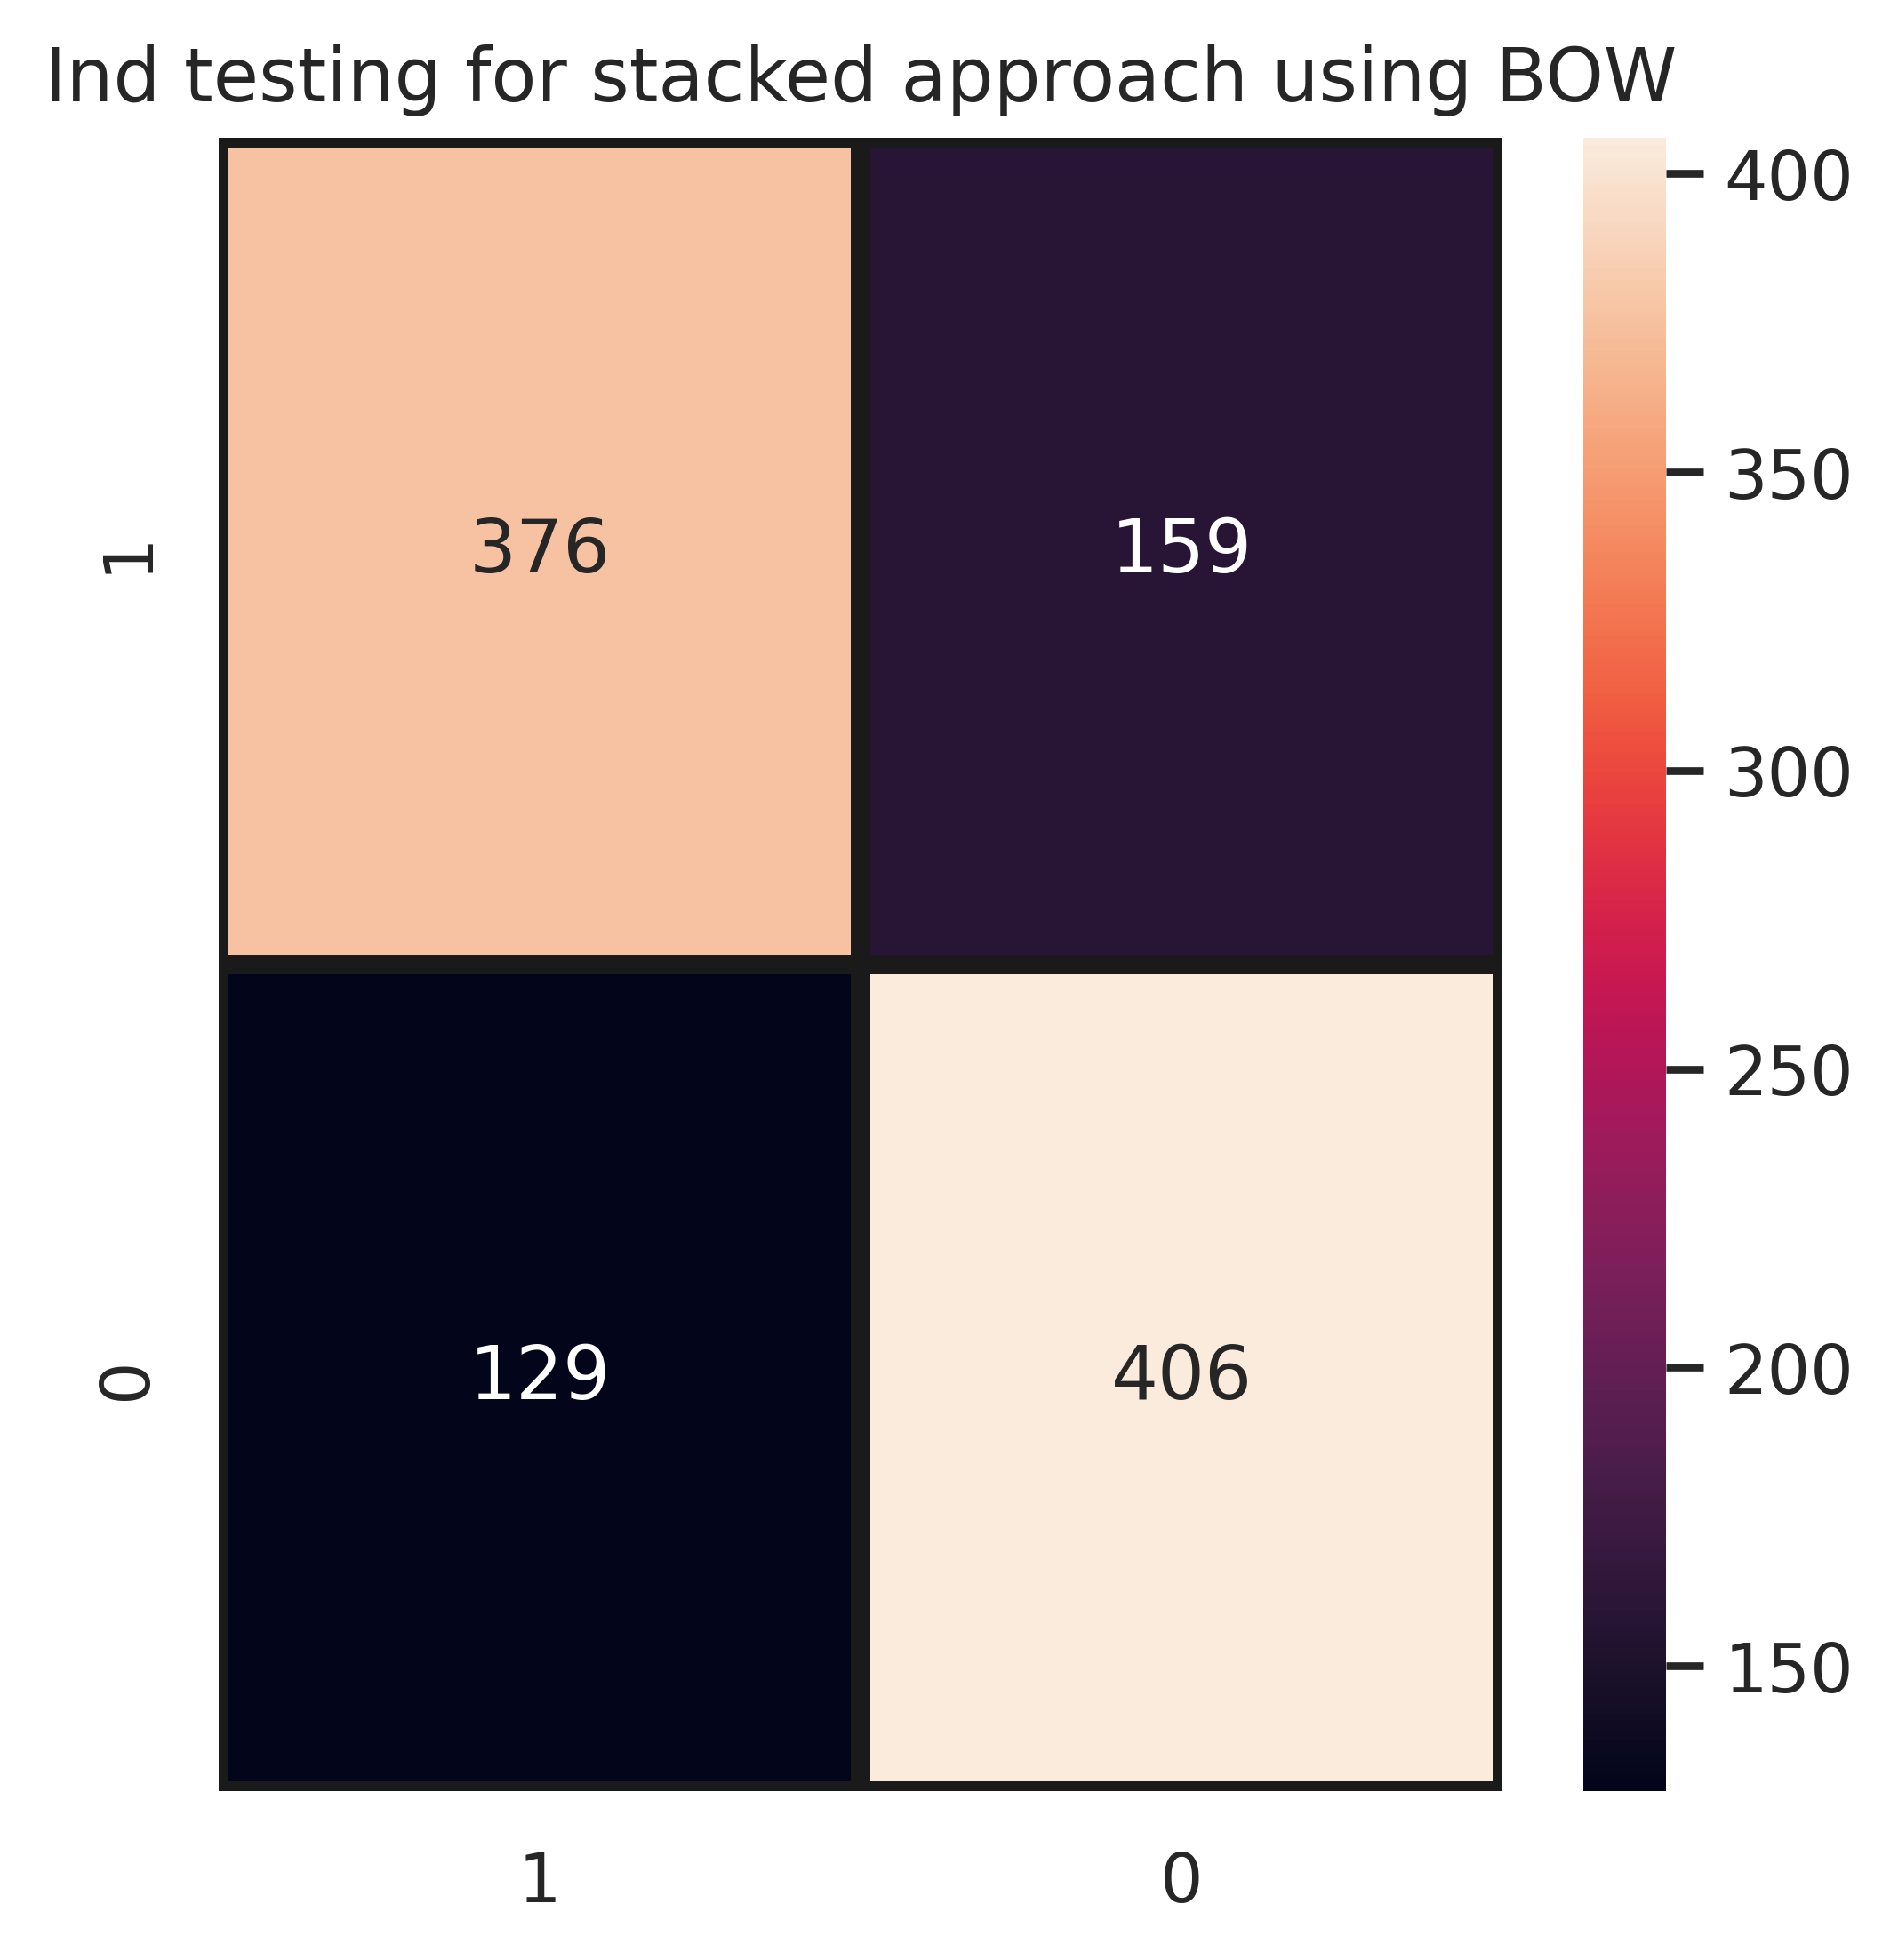

In [ ]:
array4=[[376,  159],
 [129, 406]]
import matplotlib.pyplot as plt
import seaborn as sns
RF = pd.DataFrame(array4, index = [i for i in "10"],
                  columns = [i for i in "10"])

i=1
def plot_sub_sentiment(Airline):
    sns.set()
    #tmp = rfc.fit(X_train, y_train.ravel())
    sns.heatmap(Airline,annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("",fontsize=8)

plt.figure(1,figsize=(4, 4),dpi=500)
plt.subplot(111) 
plot_sub_sentiment(RF)


plt.tight_layout(pad=0) 
plt.title("Ind testing for stacked approach using BOW")
# Show graphic
#plt.savefig('ConGBM.pdf')
plt.show()

In [ ]:
lr=LogisticRegression().fit(X_train,y_train)
et=ExtraTreesClassifier().fit(X_train,y_train)
#rf=RandomForestClassifier().fit(X_train,y_train)
knn=BernoulliNB().fit(X_train,y_train)
svc=SVC(probability=True).fit(X_train,y_train)
#bnbb=BernoulliNB().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


#rf_probs = rf.predict_proba(X_test)
#rf_probs = rf_probs[:, 1]
#rf_auc = roc_auc_score(y_test, rf_probs)
#rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_probs)

lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, lr_probs)

ber_probs = bnb.predict_proba(X_test)
ber_probs = ber_probs[:, 1]
ber_auc = roc_auc_score(y_test, ber_probs)
stack_fpr, stack_tpr, thresholdb = roc_curve(y_test, ber_probs)

et_probs = et.predict_proba(X_test)
et_probs = et_probs[:, 1]
et_auc = roc_auc_score(y_test, et_probs)
et_fpr, et_tpr, thresholde = roc_curve(y_test, et_probs)


knn_probs = knn.predict_proba(X_test)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
knn_fpr, knn_tpr, thresholde = roc_curve(y_test, knn_probs)

svc_probs = svc.predict_proba(X_test)
svc_probs = svc_probs[:, 1]
svc_auc = roc_auc_score(y_test, svc_probs)
svc_fpr, svc_tpr, thresholde = roc_curve(y_test, svc_probs)



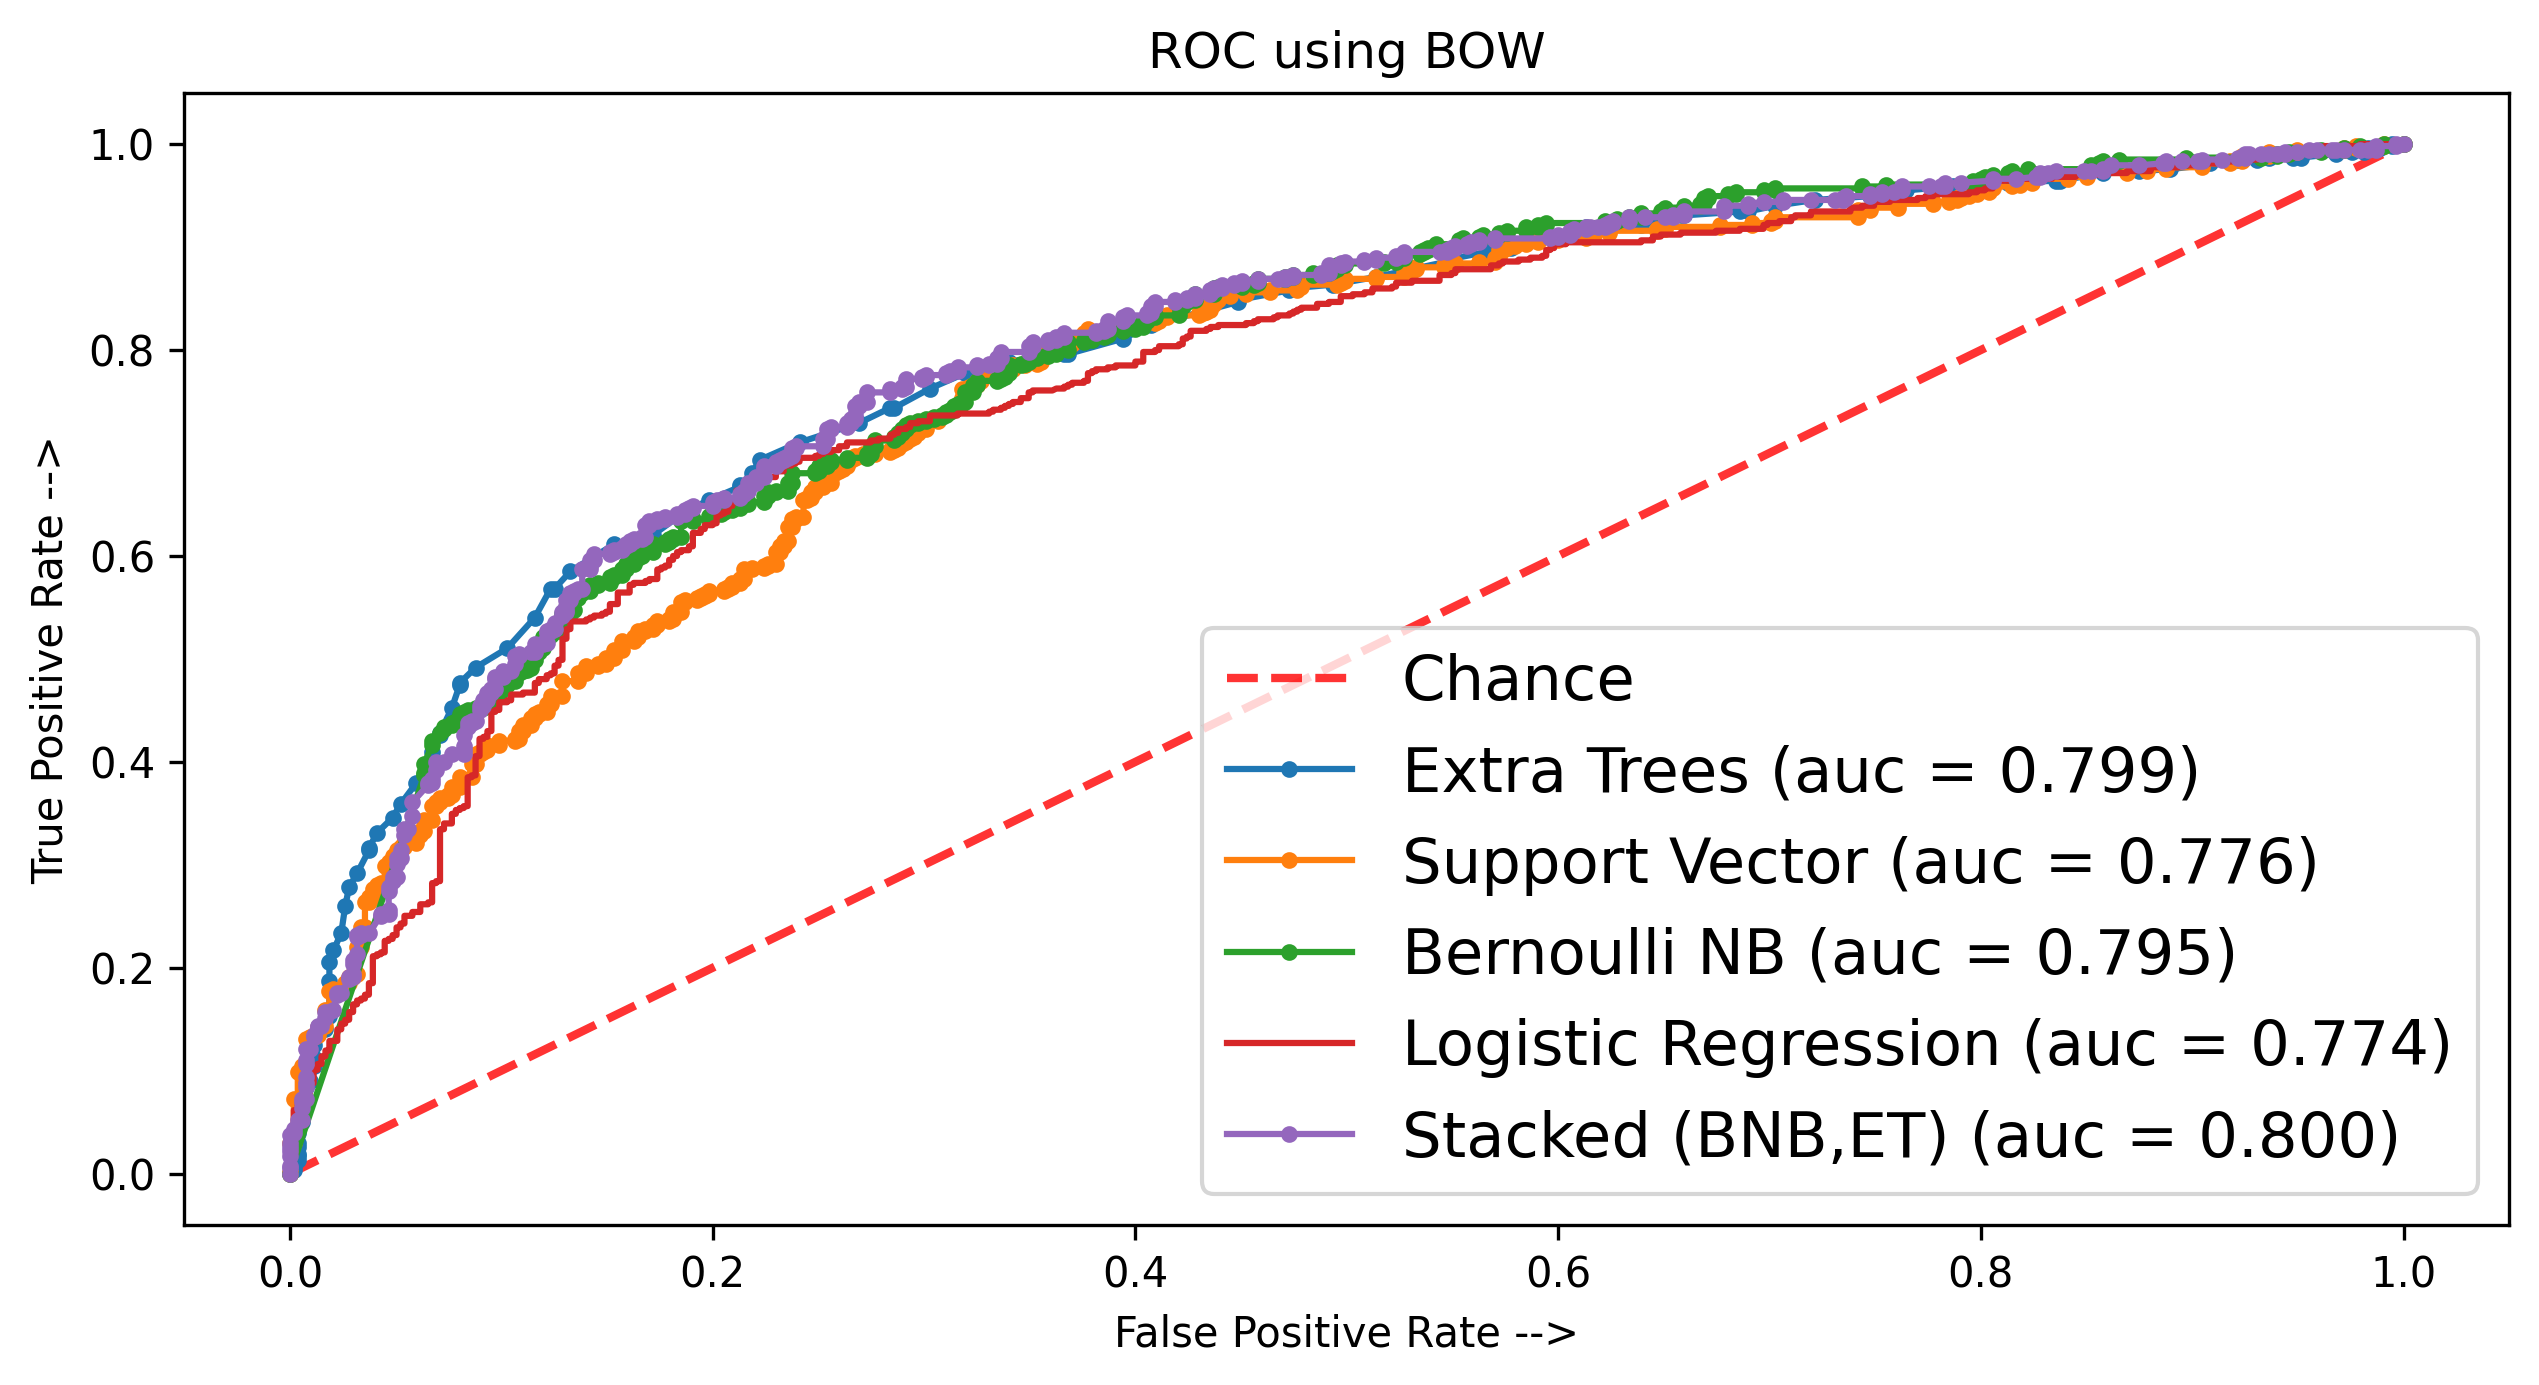

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.plot(et_fpr, et_tpr, marker='.', label='Extra Trees (auc = %0.3f)' % et_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Support Vector (auc = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Bernoulli NB (auc = %0.3f)' % knn_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression (auc = %0.3f)' % lr_auc)
plt.plot(stack_fpr, stack_tpr, marker='.', label='Stacked (BNB,ET) (auc = %0.3f)' % ber_auc)



plt.title('ROC using BOW')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=15, ncol=1)

plt.show()

In [ ]:
from sklearn.metrics import f1_score
bnb_p=lr.predict(X_test)
cm1 = confusion_matrix(y_test,bnb_p)
tp=cm1[0,0]
fp=cm1[0,1]
fn=cm1[1,0]
tn=cm1[1,1]

pr=tp/(tp+fp)
rc=tp/(tp+fn)
#f1=2*(pr*rc)/(pr+rc)
print("Accuracy",metrics.accuracy_score(y_test,bnb_p)*100)
print("Precision", pr*100)
print("Sen", rc*100)
print("F1",f1_score(y_test, bnb_p, average='macro')*100)

#print(classification_report(y_test,bnb_p))

Accuracy 70.65420560747664
Precision 70.2803738317757
Sen 70.80979284369114
F1 70.65379549369193


In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
#st=stack.fit(X_train,y_train)
#st_pred=st.predict(X_test)

cm1 = confusion_matrix(y_test,bnb_p)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("MCC RF: ",matthews_corrcoef(y_test,bnb_p)*100)
#print(classification_report(y_test,bnb_p))

Confusion Matrix : 
 [[376 159]
 [155 380]]
Accuracy :  0.7065420560747664
Sensitivity :  0.702803738317757
Specificity :  0.7102803738317757
MCC RF:  41.30956583507809


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
ber=BernoulliNB().fit(X_train,y_train)
ber_p=ber.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

cm2 = confusion_matrix(y_test,ber_p)
tp=cm2[0,0]
fp=cm2[0,1]
fn=cm2[1,0]
tn=cm2[1,1]

pr1=tp/(tp+fp)
rc1=tp/(tp+fn)
#f1=2*(pr*rc)/(pr+rc)
print("Accuracy",metrics.accuracy_score(y_test,ber_p)*100)
print("Precision", pr*100)
print("Recall", rc*100)
print("F1",f1_score(y_test, ber_p, average='macro')*100)

#print(classification_report(y_test,bnb_p))

Accuracy 73.64485981308411
Precision 69.90654205607477
Recall 74.9498997995992
F1 73.59171570703906


In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
from sklearn import metrics
et=ExtraTreesClassifier().fit(X_train,y_train)
et_p=et.predict(X_test)

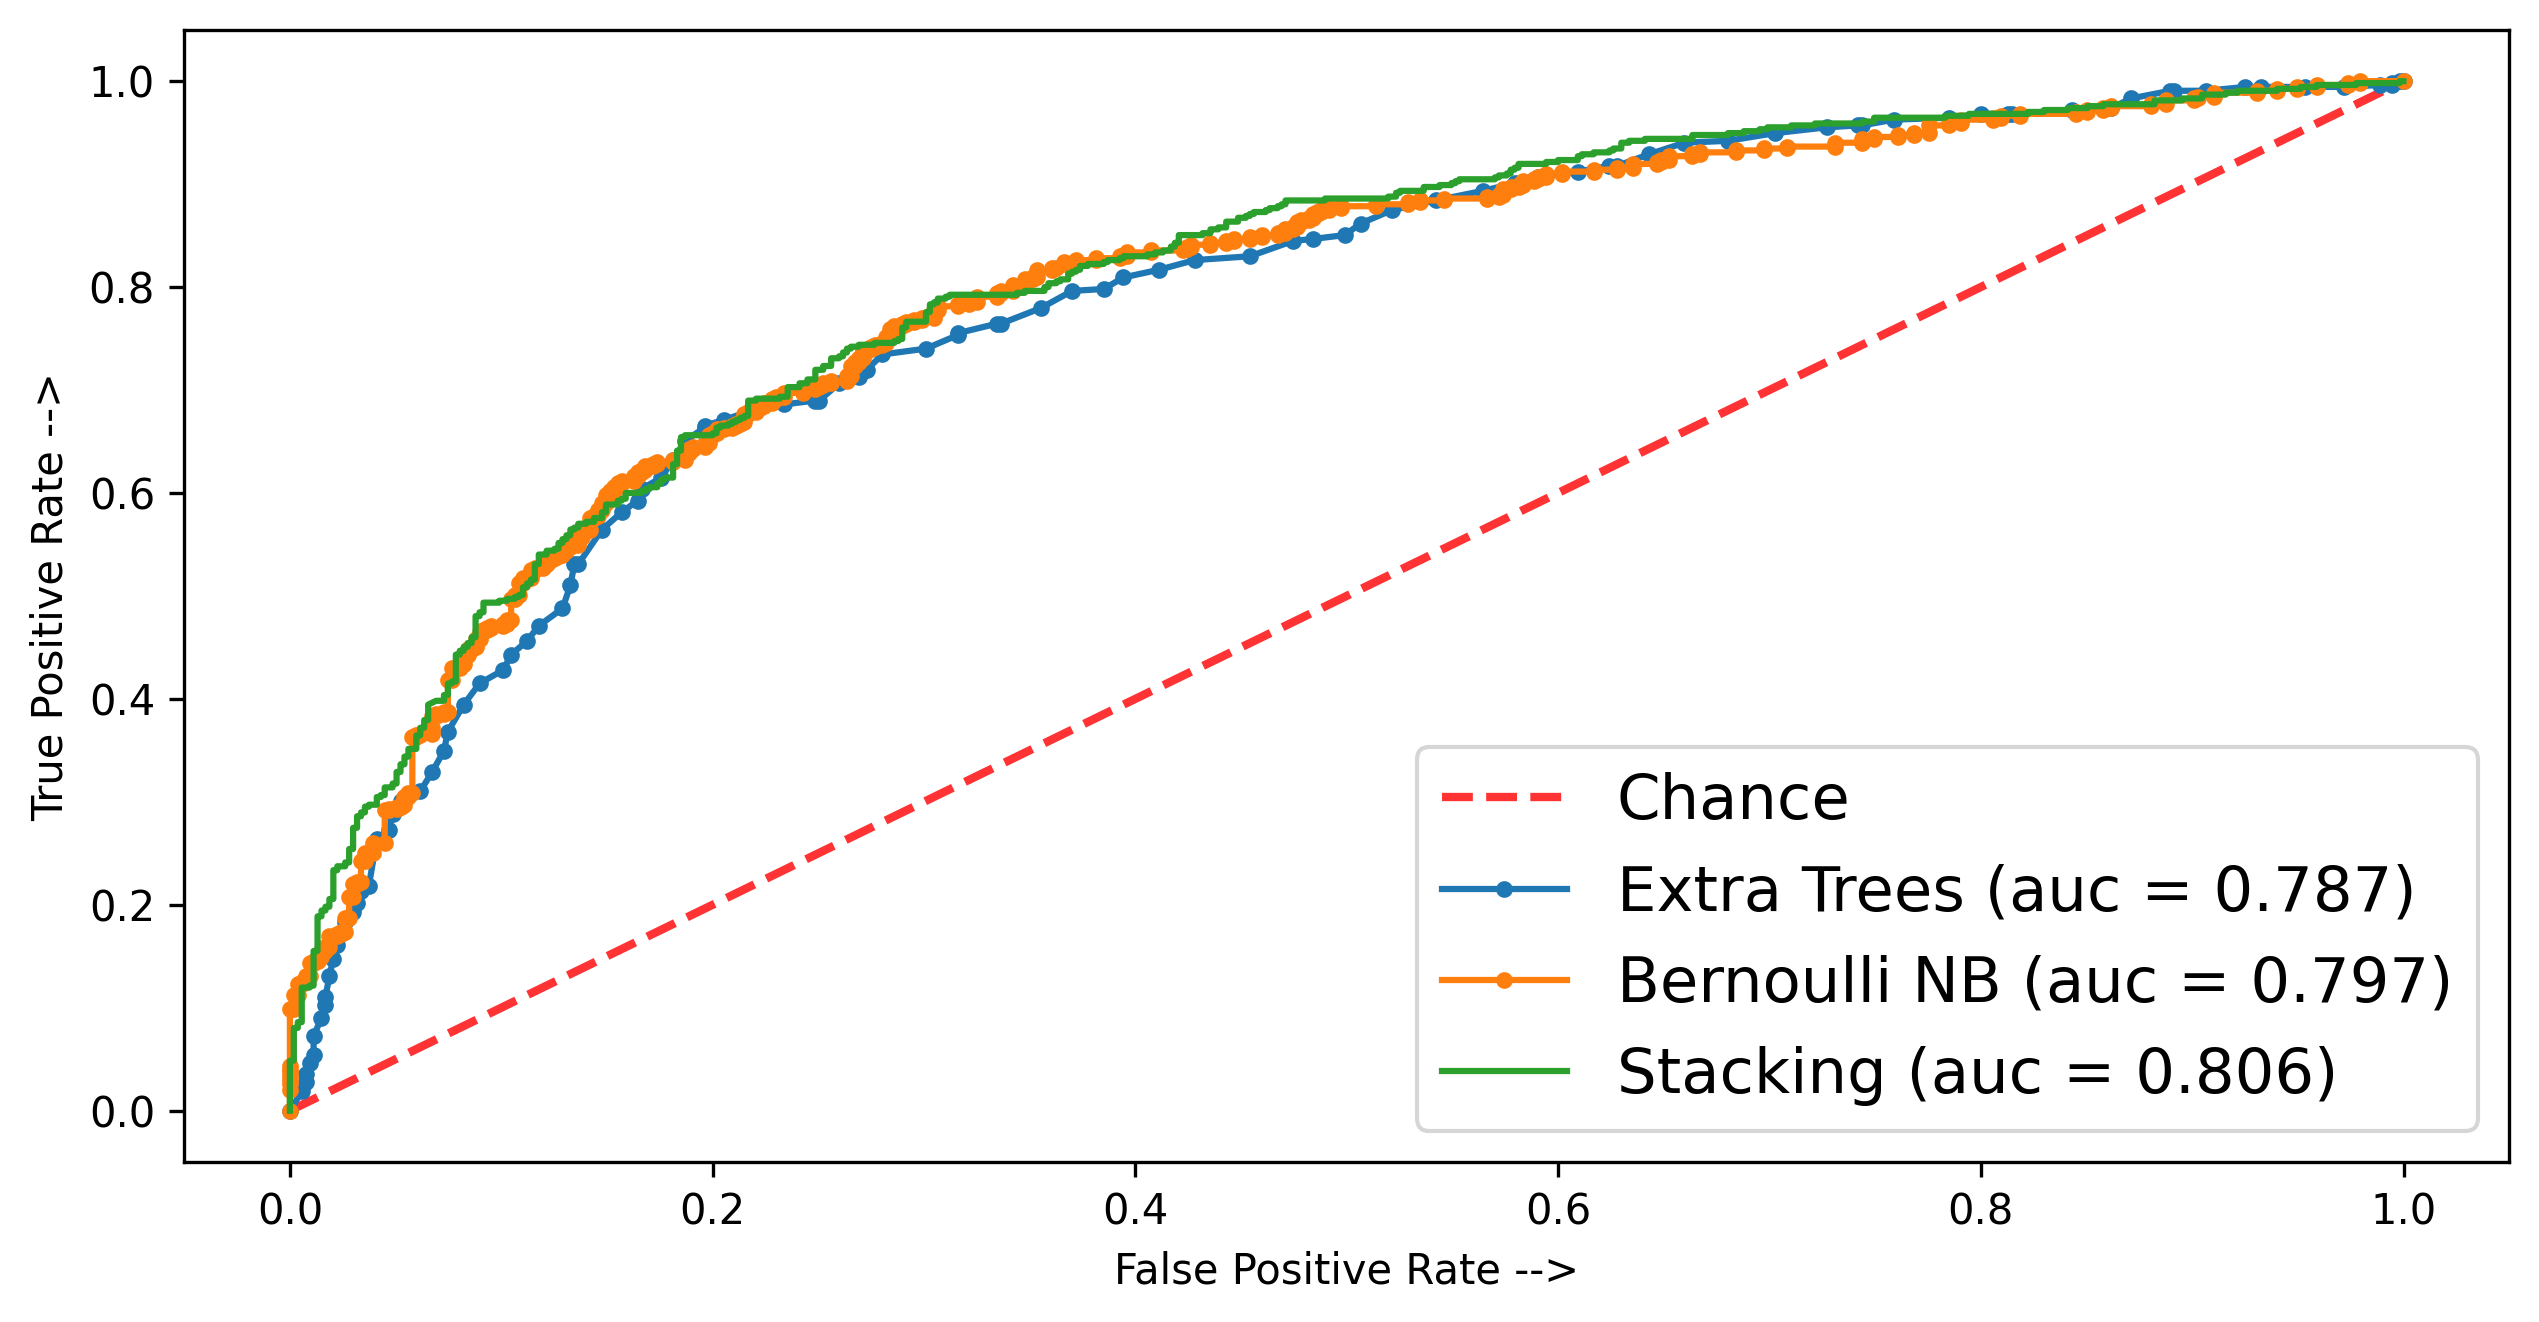

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_probs = bnb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_probs)

ber_probs = ber.predict_proba(X_test)
ber_probs = ber_probs[:, 1]
ber_auc = roc_auc_score(y_test, ber_probs)
rf_fprb, rf_tprb, thresholdb = roc_curve(y_test, ber_probs)

et_probs = et.predict_proba(X_test)
et_probs = et_probs[:, 1]
et_auc = roc_auc_score(y_test, et_probs)
rf_fpre, rf_tpre, thresholde = roc_curve(y_test, et_probs)


plt.figure(figsize=(10, 5), dpi=300)
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.plot(rf_fpre, rf_tpre, marker='.', label='Extra Trees (auc = %0.3f)' % et_auc)
plt.plot(rf_fprb, rf_tprb, marker='.', label='Bernoulli NB (auc = %0.3f)' % ber_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Stacking (auc = %0.3f)' % rf_auc)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend(loc="lower right", fontsize=15, ncol=1)

plt.show()

In [ ]:
#BOW 1 staxk
Accuracy =73.73831775700934
Precision = 71.77570093457943
Recall =74.70817120622569
F1 =73.72819821417805

In [ ]:
bnb_p=bnb.predict(X_test)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn import metrics
clfs = list()
#clfs.append(('ridge', ridge))
clfs.append(('rf',RandomForestClassifier()))
clfs.append(('extra',ExtraTreesClassifier()))
#clfs.append(('ada',AdaBoostClassifier()))
#clfs.append(('bnb',RandomForestClassifier()))
clfs_est = LogisticRegression()
stack = StackingClassifier(estimators=clfs, final_estimator=clfs_est)

In [ ]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,matthews_corrcoef,classification_report
st=stack.fit(X_train,y_train)
st_pred=st.predict(X_test)

cm1 = confusion_matrix(y_test,st_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("MCC RF: ",matthews_corrcoef(y_test,st_pred)*100)
print(classification_report(y_test,st_pred))

Confusion Matrix : 
 [[384 151]
 [124 411]]
Accuracy :  0.7429906542056075
Sensitivity :  0.7177570093457943
Specificity :  0.7682242990654206
MCC RF:  48.66013775238049
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       535
           1       0.73      0.77      0.75       535

    accuracy                           0.74      1070
   macro avg       0.74      0.74      0.74      1070
weighted avg       0.74      0.74      0.74      1070



In [ ]:
tp=cm1[0,0]
fp=cm1[0,1]
fn=cm1[1,0]
tn=cm1[1,1]

pr=tp/(tp+fp)
rc=tp/(tp+fn)
f1=2*(pr*rc)/(pr+rc)
f1

In [ ]:
pr=tp/(tp+fp)
rc=tp/(tp+fn)
f1=2*(pr*rc)/(pr+rc)
f1

0.7363374880153404

In [ ]:
rc

0.7559055118110236

In [ ]:
print("F1",f1_score(y_test, st_pred, average='micro'))

F1 0.7429906542056075


In [ ]:

lr=LogisticRegression()

et=ExtraTreesClassifier()
#rf=RandomForestClassifier().fit(X_train,y_train)
bb=BernoulliNB()
svc=SVC(probability=True)
#bnb=BernoulliNB().fit(X_train,y_train)

In [ ]:
len(y)
knn=KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,matthews_corrcoef,f1_score
from sklearn.model_selection import StratifiedKFold

mcc=[]
sp=[]
sn=[]
f1=[]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
for train_index, test_index in skf.split(X3, y):
    x_train_fold, x_test_fold = X3[train_index], X3[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    #print(y_train_fold)
    stack.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(stack.score(x_test_fold, y_test_fold))

    pred_lr5=stack.predict(x_test_fold)
    cm1 = confusion_matrix(y_test_fold,pred_lr5)
    tp=cm1[0,0]
    fp=cm1[0,1]
    fn=cm1[1,0]
    tn=cm1[1,1]

    pr=tp/(tp+fp)
    rc=tp/(tp+fn)
    total1=sum(sum(cm1))
    accuracy1=(cm1[0,0]+cm1[1,1])/total1

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sn.append(sensitivity1)

    specificity1 = pr
    sp.append(specificity1)
    #mccc=matthews_corrcoef(pred_lr5, y_test_fold)
    #mcc.append(mccc)
    f1=f1_score(y_test_fold, pred_lr5, average='macro')
    print(f1)
    #f1.append(f1)
    #cmlr = confusion_matrix(x_test_fold,y_test_fold)
#print('Confusion Matrix : \n', cmlr)
import numpy as np
print('\n Accuracy:',np.mean(lst_accu_stratified)*100)
print('\n SP:',np.mean(sp)*100)
print('\nSN:',np.mean(sn)*100)
#print('\n MCC:',np.mean(mcc)*100)
print('\n F1:',np.mean(f1)*100)

0.7225497507555836


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.mean([0.9095726915830135,
0.9151463458993672,
0.9116020698051948,
0.8727667686305803,
0.9039259273332954])

In [ ]:
#pip install lazypredict

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [19:12<00:00, 39.76s/it]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.73,0.73,0.73,36.77
BernoulliNB,0.70,0.70,0.70,0.70,2.29
RandomForestClassifier,0.69,0.69,0.69,0.69,17.88
XGBClassifier,0.69,0.69,0.69,0.69,111.21
LGBMClassifier,0.68,0.68,0.68,0.68,7.08
NearestCentroid,0.68,0.68,0.68,0.68,2.08
NuSVC,0.68,0.68,0.68,0.68,199.01
AdaBoostClassifier,0.68,0.68,0.68,0.68,41.24
SVC,0.68,0.68,0.68,0.67,198.24
